### Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import glob
from pykrige.ok import OrdinaryKriging
import geopandas

### Read in data as a pandas dataframe

In [2]:
# read in the data file
df = pd.read_csv('DataBoxTest.csv')
df.head()

,X,Y,SurveyID,SurveyNumber,MagAnomaly,uncertainty
0,46151.609177,1.961198e+06,FRNL85-4,33,16.6,61
1,45651.044944,1.961165e+06,FRNL85-4,33,17.0,61
2,45161.357474,1.961143e+06,FRNL85-4,33,18.4,61
3,44671.665965,1.961120e+06,FRNL85-4,33,19.8,61
4,44181.970414,1.961098e+06,FRNL85-4,33,22.2,61


In [3]:
# separate the data from the data file
x = df.iloc[:,0]            # x position in meters
y = df.iloc[:,1]            # y position in meters
ID = df.iloc[:,2]           # name of the marine data survey
survey_num = df.iloc[:,3]   # integer identifier of data survey
mag = df.iloc[:,4]          # magnetic data survey value in nanotesla
uncertainty = df.iloc[:,5]  # uncertainty value for mag data in nanotelsa

### Initial Plot of survey lines

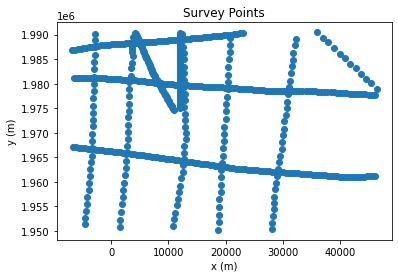

In [4]:
# plot the survey lines
plt.scatter(x,y)
plt.title('Survey Points')
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.show()

### Create a grid and interpolate data

In [5]:
# create a grid of the survey location (fill in points between lines)
grid_x = np.linspace(np.min(x)+0.01,np.max(x)-0.01,543)
grid_y = np.linspace(np.min(y)+0.01,np.max(y)-0.01,543)

In [6]:
# iterpolate the magnetic data to the new grid points - using gaussian distribution
OK = OrdinaryKriging(x,y,mag,variogram_model='gaussian',nlags=40)
mag1,ss1 = OK.execute('grid',grid_x,grid_y)

### Account for uncertainty

I think there should be an inversion (least squares) problem here to account for the uncertainty however I am not sure what the sensitivity matrix is for this problem and thus I am just matrix multiplying the magnetic data by the weighting matrix which is created from the uncertainty for the time being.

In [7]:
# set up the weighting matrix with 1/uncertainty 
W = np.eye(543)
std = 1/uncertainty
for i in range(len(mag1)):
    W[i,i] = std[i]

# include weighting matrix in final solution
final_mag = W@mag1

### Plot the results

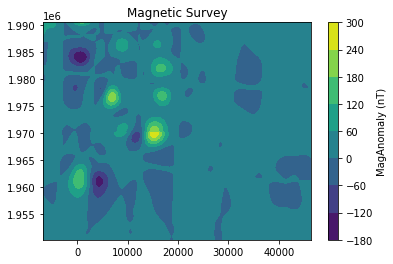

In [8]:
# plot the results
xinterp,yinterp = np.meshgrid(grid_x,grid_y)
plt.contourf(xinterp,yinterp,final_mag)
plt.colorbar(label='MagAnomaly (nT)')
plt.title('Magnetic Survey')
plt.show()

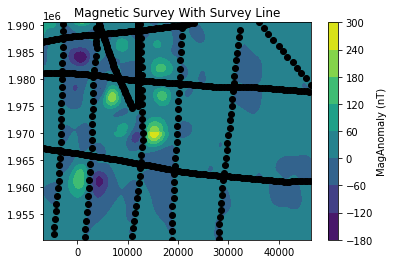

In [9]:
# plot the results with the survey lines overlaid
xinterp,yinterp = np.meshgrid(grid_x,grid_y)
plt.contourf(xinterp,yinterp,final_mag)
plt.colorbar(label='MagAnomaly (nT)')
plt.scatter(x,y,color='k')
plt.title('Magnetic Survey With Survey Line')
plt.show()